## Modulos, bibliotecas e inicializações

In [1]:
import pandas as pd
import sweetviz as sv
import sklearn
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import numpy as np
import warnings
from scipy import signal
import os.path

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.VisibleDeprecationWarning = DeprecationWarning

In [3]:
data_dir = os.path.join('.','aurorabp-sample-data-main/sample')

In [4]:
participants_df = pd.read_csv(os.path.join(data_dir, 'participants.tsv'), sep='\t')
features_df = pd.read_csv(os.path.join(data_dir, 'features.tsv'), sep='\t')
oscillometric_df = pd.read_csv(os.path.join(data_dir, 'measurements_oscillometric.tsv'), sep='\t')
auscultatory_df = pd.read_csv(os.path.join(data_dir, 'measurements_auscultatory.tsv'), sep='\t')

## Separando faixa de dados:

In [5]:
features_df

,pid,phase,measurement,date_time,sbp,dbp,baseline_sbp,baseline_dbp,delta_sbp,delta_dbp,...,delta_dicrotic_notch_height_pressure,delta_dpdt_pressure,delta_ejection_duration_fraction_pressure,delta_ejection_duration_pressure,delta_hr_pressure,delta_quality_pressure,delta_rwat_pressure,delta_sysrise_pressure,delta_invpat_pressure,delta_rpat_pressure
0,o000,ambulatory,measurement 23,2018-01-01 12:17:45,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
1,o000,ambulatory,measurement 25,2018-01-01 12:47:27,141.0,88.0,135.5,93.0,5.5,-5.0,...,-0.142595,-0.646054,0.034060,-0.0325,18.043242,0.166928,-0.035,-0.0350,-0.339737,0.00925
2,o000,ambulatory,measurement 27,2018-01-01 13:17:30,139.0,93.0,135.5,93.0,3.5,0.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
3,o000,ambulatory,measurement 28,2018-01-01 13:46:55,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
4,o000,ambulatory,measurement 30,2018-01-01 14:17:10,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,a005,return,Temporal challenge start 1,2018-01-02 14:38:34,115.0,71.0,110.0,68.0,5.0,3.0,...,0.093355,-0.938597,0.016637,-0.0025,3.002960,0.000000,0.010,0.0675,-0.813435,0.01925
381,a005,return,Temporal challenge start 2,2018-01-02 14:40:13,109.0,71.0,110.0,68.0,-1.0,3.0,...,0.007684,-3.519975,-0.005762,-0.0175,2.754045,0.000000,0.010,-0.0425,-0.500740,0.01125
382,a005,return,Temporal challenge start 3,2018-01-02 14:41:54,121.5,74.0,110.0,68.0,11.5,6.0,...,-0.069275,-4.135001,0.011637,-0.0125,4.640690,0.000000,0.010,0.0125,-0.459383,0.01025
383,a005,synthetic,Calibration average values,NaN,110.0,68.0,110.0,68.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.00000


In [6]:
participants_df

,pid,n_meas_inlab,n_meas_ambulatory,aurora_size,fitzpatrick_scale,bp_cuff_arm,in_feature_table,age,height,weight,...,coronary_artery_disease,diabetes,arrythmia,previous_heart_attack,previous_stroke,heart_failure,aortic_stenosis,valvular_heart_disease,other_cv_diseases,cvd_meds
0,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,0,0,0,0,0,0,0,0,0,0
1,o001,15,43.0,M,4.0,L,1,52.0,72.0,171.0,...,0,0,0,0,0,0,0,0,0,0
2,o002,0,47.0,M,NaN,R,0,46.0,62.0,190.0,...,0,1,0,0,0,0,0,0,1,1
3,o003,14,46.0,S,2.0,R,1,43.0,63.0,170.0,...,0,0,0,0,0,0,0,0,0,1
4,o004,14,39.0,S,NaN,R,1,49.0,66.0,154.0,...,0,0,0,0,0,0,0,0,1,1
5,o005,14,40.0,M,NaN,R,1,30.0,71.0,160.0,...,0,0,0,0,0,0,0,0,0,0
6,a000,14,NaN,S,2.0,L,1,56.0,63.0,108.0,...,0,0,0,0,0,0,0,0,0,0
7,a001,11,NaN,S,1.0,L,1,51.0,66.0,125.0,...,0,0,0,0,0,0,0,0,0,0
8,a002,19,NaN,L,2.0,L,1,33.0,74.0,230.0,...,0,0,0,0,0,0,0,0,0,0
9,a003,20,NaN,L,1.0,R,0,78.0,68.0,260.0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
oscillometric_df

,pid,phase,measurement,date_time,sbp,dbp,duration,pressure_quality,optical_quality,waveform_file_path,waveforms_generated
0,o000,initial,Sitting arm down,2018-01-01 11:10:58,138.0,104.0,30.0,1.000,0.431,measurements_oscillometric/o000/o000.initial.S...,1
1,o000,initial,Sitting arm lap,2018-01-01 11:13:10,140.0,92.0,30.0,0.000,0.467,measurements_oscillometric/o000/o000.initial.S...,1
2,o000,initial,Sitting arm up,2018-01-01 11:16:41,138.0,90.0,30.0,0.740,0.471,measurements_oscillometric/o000/o000.initial.S...,1
3,o000,initial,Supine 1,2018-01-01 11:23:10,137.0,96.0,30.0,0.686,0.943,measurements_oscillometric/o000/o000.initial.S...,1
4,o000,initial,Supine 2,2018-01-01 11:24:51,134.0,90.0,30.0,0.821,0.948,measurements_oscillometric/o000/o000.initial.S...,1
...,...,...,...,...,...,...,...,...,...,...,...
303,o005,ambulatory,measurement 76,2018-01-02 15:17:30,119.0,86.0,15.0,0.000,0.861,measurements_oscillometric/o005/o005.ambulator...,1
304,o005,ambulatory,measurement 77,2018-01-02 15:47:33,131.0,83.0,15.0,0.676,0.994,measurements_oscillometric/o005/o005.ambulator...,1
305,o005,return,Signal check,2018-01-02 16:01:15,122.0,76.0,30.0,0.000,0.526,measurements_oscillometric/o005/o005.return.Si...,1
306,o005,return,Sitting arm lap,2018-01-02 16:03:08,116.0,82.0,30.0,0.000,0.904,measurements_oscillometric/o005/o005.return.Si...,1


In [8]:
pid_count = 3
osci_count = 3
sampling_rate = 100
ppt_osci_df = oscillometric_df.loc[oscillometric_df.pid == participants_df.pid[pid_count]]
## carregar dataset do waveform
osci_series = ppt_osci_df.iloc[osci_count]

In [33]:
ppt_osci_df

,pid,phase,measurement,date_time,sbp,dbp,duration,pressure_quality,optical_quality,waveform_file_path,waveforms_generated
143,o003,initial,Sitting arm down,2018-01-01 09:30:42,132.0,92.0,30.0,0.968,0.000,measurements_oscillometric/o003/o003.initial.S...,1
144,o003,initial,Sitting arm lap,2018-01-01 09:32:51,132.0,95.0,30.0,1.000,0.381,measurements_oscillometric/o003/o003.initial.S...,1
145,o003,initial,Sitting arm up,2018-01-01 09:34:48,136.0,91.0,30.0,0.845,0.880,measurements_oscillometric/o003/o003.initial.S...,1
146,o003,initial,Supine 1,2018-01-01 09:40:19,131.0,78.0,30.0,1.000,0.990,measurements_oscillometric/o003/o003.initial.S...,1
147,o003,initial,Supine 2,2018-01-01 09:41:54,131.0,77.0,30.0,1.000,0.995,measurements_oscillometric/o003/o003.initial.S...,1
148,o003,initial,Standing arm down,2018-01-01 09:47:35,130.0,87.0,30.0,0.948,0.000,measurements_oscillometric/o003/o003.initial.S...,1
149,o003,initial,Standing arm up,2018-01-01 09:49:03,141.0,94.0,30.0,0.676,0.954,measurements_oscillometric/o003/o003.initial.S...,1
150,o003,initial,Walking,2018-01-01 09:52:44,154.0,88.0,30.0,0.851,0.000,measurements_oscillometric/o003/o003.initial.W...,1
151,o003,initial,Running,2018-01-01 09:56:06,169.0,88.0,30.0,0.754,0.000,measurements_oscillometric/o003/o003.initial.R...,1
152,o003,initial,Cool down 1,2018-01-01 09:59:54,141.0,86.0,30.0,0.559,0.482,measurements_oscillometric/o003/o003.initial.C...,1


In [9]:
osci_series

pid                                                                 o003
phase                                                            initial
measurement                                                     Supine 1
date_time                                            2018-01-01 09:40:19
sbp                                                                131.0
dbp                                                                 78.0
duration                                                            30.0
pressure_quality                                                     1.0
optical_quality                                                     0.99
waveform_file_path     measurements_oscillometric/o003/o003.initial.S...
waveforms_generated                                                    1
Name: 146, dtype: object

In [10]:
waveform_df = pd.read_csv(os.path.join(data_dir, osci_series.waveform_file_path), delimiter = '\t')

In [11]:
waveform_df

,t,ekg,optical,pressure,accel_x,accel_y,accel_z
0,0.000,110.37,-312280.0,3094.4,-0.77084,-0.16231,0.61068
1,0.002,110.38,-312280.0,3094.3,-0.77045,-0.16192,0.61107
2,0.004,110.39,-312280.0,3094.2,-0.77006,-0.16153,0.61146
3,0.006,110.40,-312260.0,3094.0,-0.76967,-0.16114,0.61185
4,0.008,110.40,-312240.0,3093.9,-0.76928,-0.16075,0.61224
...,...,...,...,...,...,...,...
14995,29.990,109.90,-310950.0,3064.0,-0.78304,-0.15919,0.60541
14996,29.992,109.90,-310950.0,3063.7,-0.78314,-0.15938,0.60502
14997,29.994,109.91,-310940.0,3063.5,-0.78324,-0.15958,0.60463
14998,29.996,109.91,-310930.0,3063.2,-0.78334,-0.15977,0.60424


In [101]:
t = waveform_df['t']
ekg = waveform_df['ekg']
_bandpass_filter(ekg.to_numpy(), 0.5, 20)
optical = waveform_df['optical']
pressure = waveform_df['pressure']
accelX = waveform_df['accel_x']
accelY = waveform_df['accel_y']
accelZ = waveform_df['accel_z']

In [104]:
ekg

0        110.37
1        110.38
2        110.39
3        110.40
4        110.40
          ...  
14995    109.90
14996    109.90
14997    109.91
14998    109.91
14999    109.91
Name: ekg, Length: 15000, dtype: float64

# Análise visual 

In [40]:
FS = 500 #frequência de amostragem
#hp -> frequência de corte inferior, lp -> frequencia de corte superior
def _bandpass_filter(data: np.ndarray, hp: float, lp: float, fs: float = FS) -> np.ndarray:
    order = 4
    b, a = signal.butter(order, (hp, lp), btype='bandpass', fs=fs)
    return signal.lfilter(b, a, data-data[0])

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def localizar_extremos(t, sinal, inicio, fim, plotar=True, ax=None):
    indices = (t >= inicio) & (t <= fim)
    t_faixa = t[indices]
    s_faixa = sinal[indices]

    if len(t_faixa) == 0:
        raise ValueError("Faixa de tempo sem dados!")

    idx_max = np.argmax(s_faixa)
    idx_min = np.argmin(s_faixa)

    t_max, val_max = t_faixa[idx_max], s_faixa[idx_max]
    t_min, val_min = t_faixa[idx_min], s_faixa[idx_min]

    print(f"Máximo: {val_max:.4f} em t = {t_max:.4f}")
    print(f"Mínimo: {val_min:.4f} em t = {t_min:.4f}")

    if plotar and ax is not None:
        ax.plot(t_max, val_max, 'ro', label='Máximo')
        ax.plot(t_min, val_min, 'bo', label='Mínimo')
        ax.legend()

    return (t_max, val_max), (t_min, val_min)


In [15]:
def buscar(df, feature, tempo=None, valor=None, tempo_col='t', aplicar_filtro=True):

    if aplicar_filtro:
        dados_filtrados = _bandpass_filter(df[feature].to_numpy(), 0.5, 20)
        df = df.copy()
        df[feature] = dados_filtrados

    if tempo is not None:
        linha = df.iloc[(df[tempo_col] - tempo).abs().argmin()]
        print(f"Tempo mais próximo: {linha[tempo_col]} - Valor filtrado de {feature}: {linha[feature]:.2f}")
        return linha[feature]

    elif valor is not None:
        linha = df.iloc[(df[feature] - valor).abs().abs().argmin()]
        print(f"Valor mais próximo: {linha[feature]:.2f} - Tempo correspondente: {linha[tempo_col]}")
        return linha[tempo_col]

    else:
        return -1


#### EKG

Máximo: 0.2566 em t = 1.1420
Mínimo: -0.6062 em t = 2.4820


((np.float64(1.142), np.float64(0.25659217546666346)),
 (np.float64(2.482), np.float64(-0.6061783288827038)))

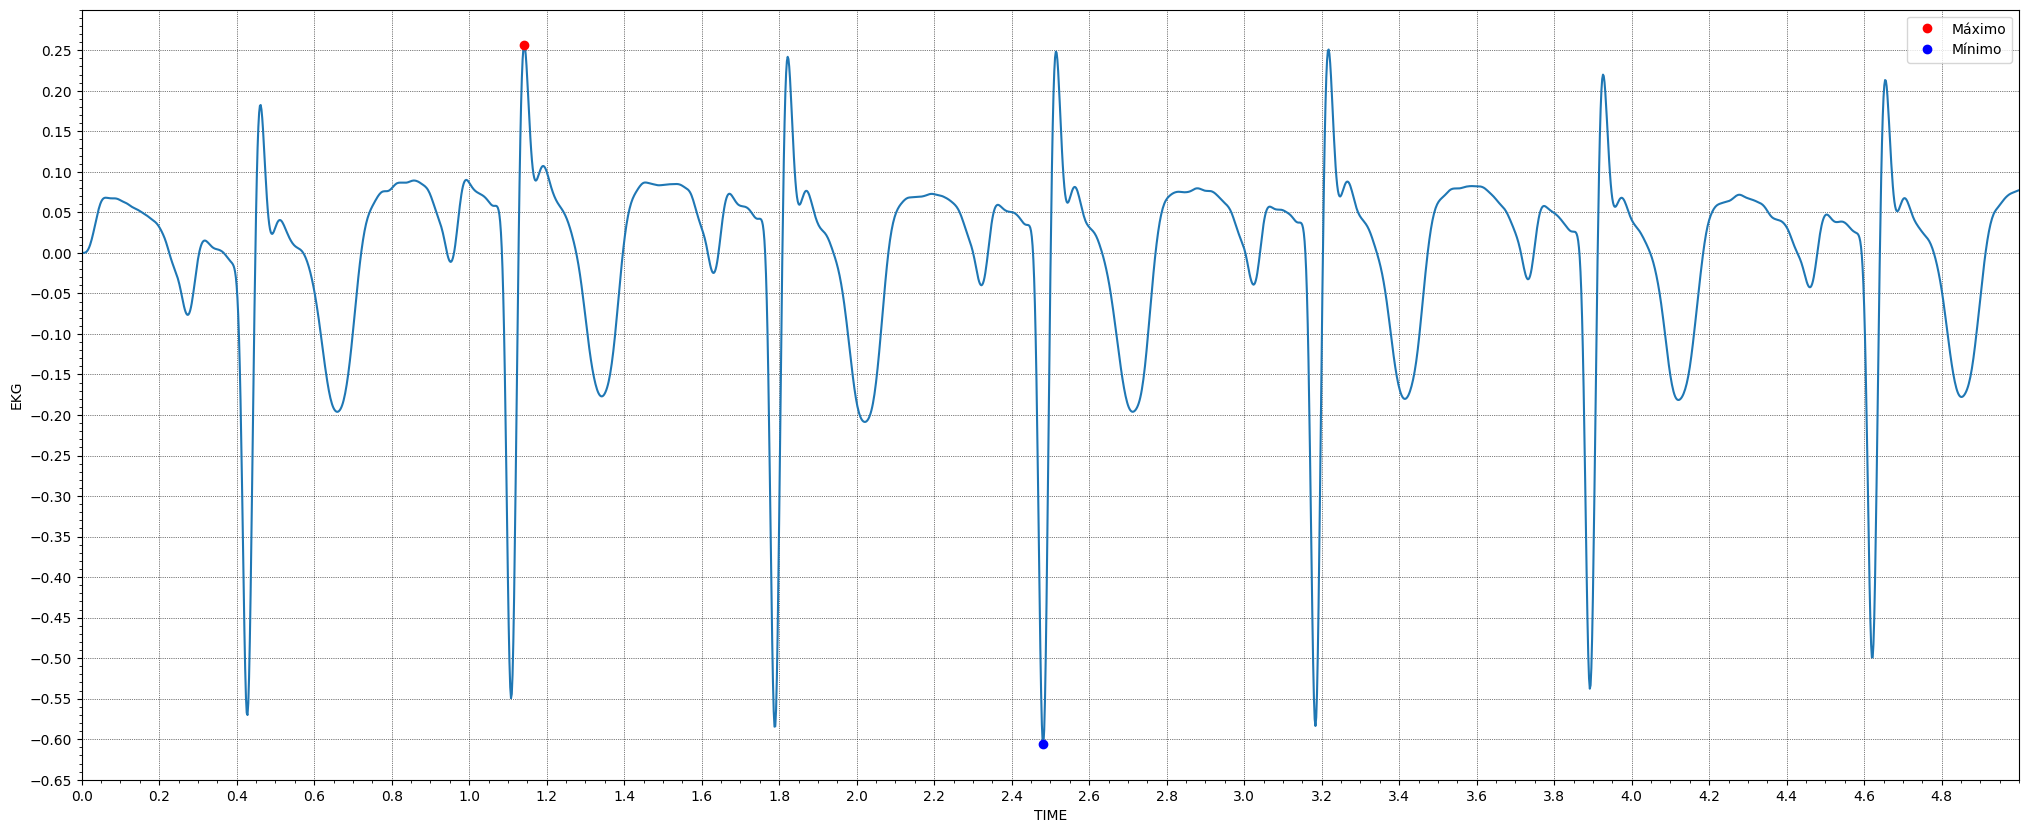

In [121]:
fig, axs = plt.subplots(1, 1, figsize=(25, 10))

# Filtrando o sinal
sinal_filtrado = _bandpass_filter(ekg.to_numpy(), 0.5, 20)
axs.plot(t, sinal_filtrado)

axs.set_xlim(0, 5)
axs.set_ylim(-0.65, 0.30)
axs.set_yticks(np.arange(-0.65, 0.30, 0.05))
axs.set_xticks(np.arange(0, 5, 0.2))
axs.minorticks_on()
axs.grid(True, which='major', color='black', linestyle=':', linewidth=0.5, axis='both')
axs.set_xlabel("TIME")
axs.set_ylabel("EKG")

# Localizando extremos dentro da faixa de 0 a 5 segundos
localizar_extremos(t, sinal_filtrado, 0, 5, plotar=True, ax=axs)


#### PRESSURE

Máximo: 68.1287 em t = 0.6640
Mínimo: -26.7165 em t = 1.5760


((np.float64(0.664), np.float64(68.12869504175382)),
 (np.float64(1.576), np.float64(-26.71647726619209)))

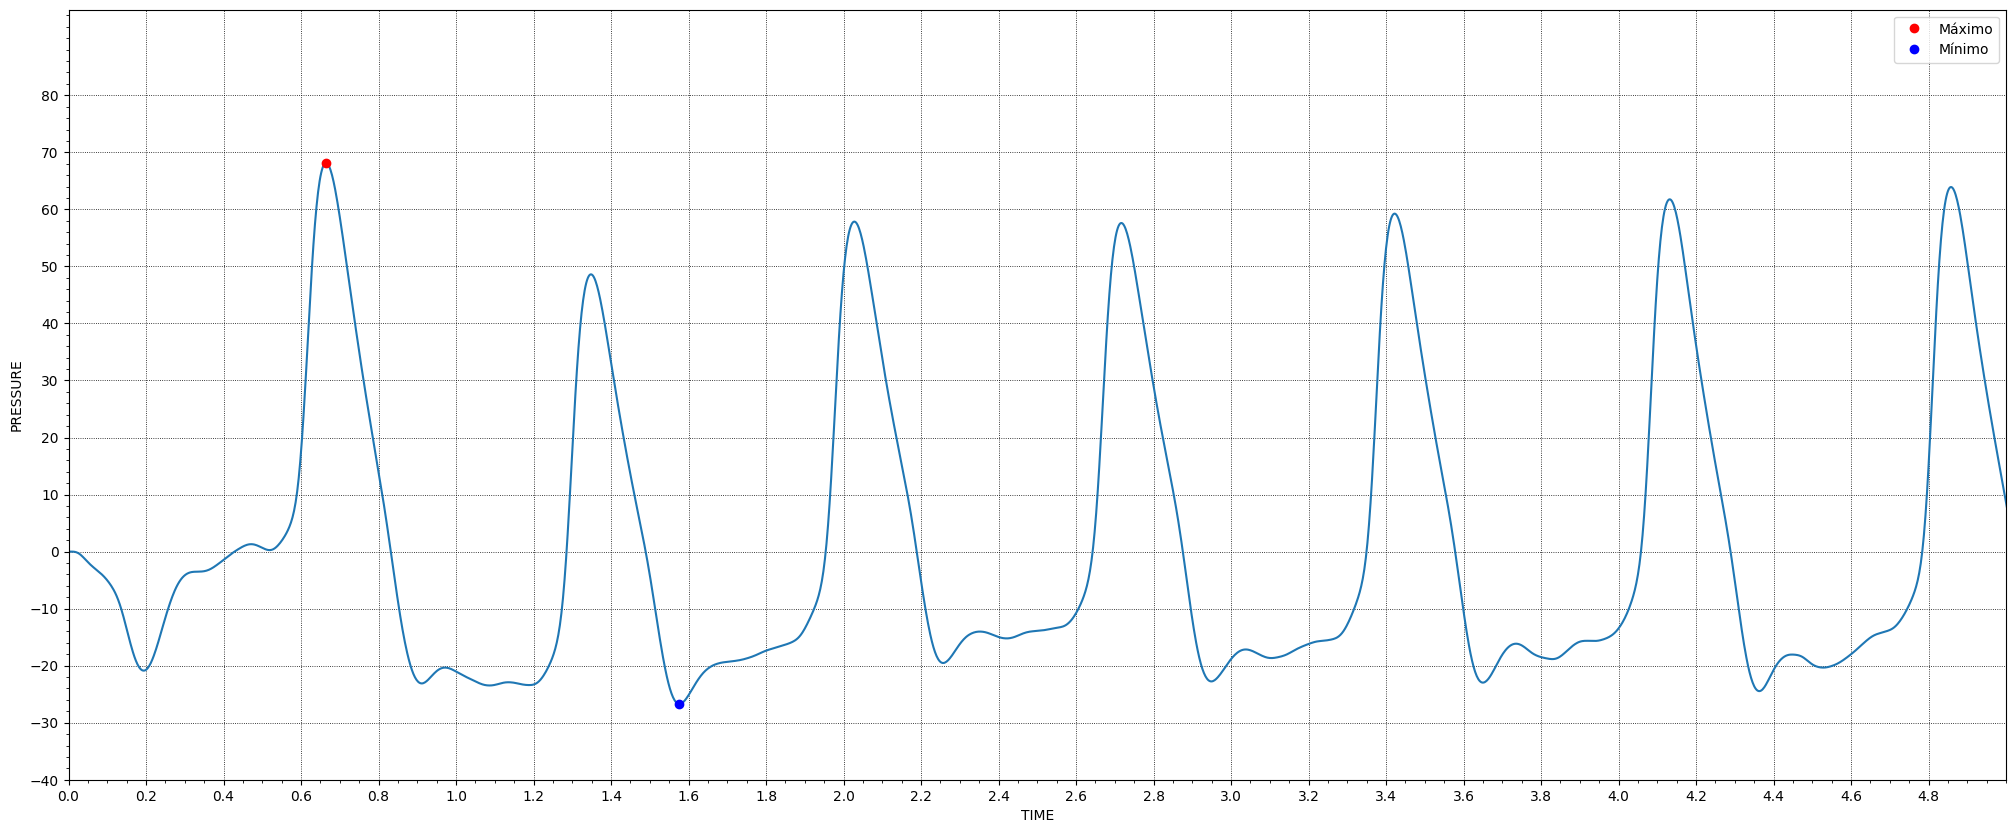

In [179]:
sinal_filtrado = _bandpass_filter(pressure.to_numpy(), 0.5, 20)

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(t, sinal_filtrado)

axs.set_xlim(0, 5)
axs.set_ylim(-40, 95)
axs.set_yticks(np.arange(-40, 85, 10))
axs.set_xticks(np.arange(0, 5, 0.2))

axs.minorticks_on()
axs.grid(True, which='major', color='black', linestyle=':', linewidth=0.6, axis='both')
axs.set_xlabel("TIME")
axs.set_ylabel("PRESSURE")

localizar_extremos(t, sinal_filtrado, 0, 5, plotar=True, ax=axs)


#### PPG / OPTICAL

Máximo: 329.5632 em t = 4.2740
Mínimo: -336.9693 em t = 1.9580


((np.float64(4.274), np.float64(329.56320513575486)),
 (np.float64(1.958), np.float64(-336.9693400225759)))

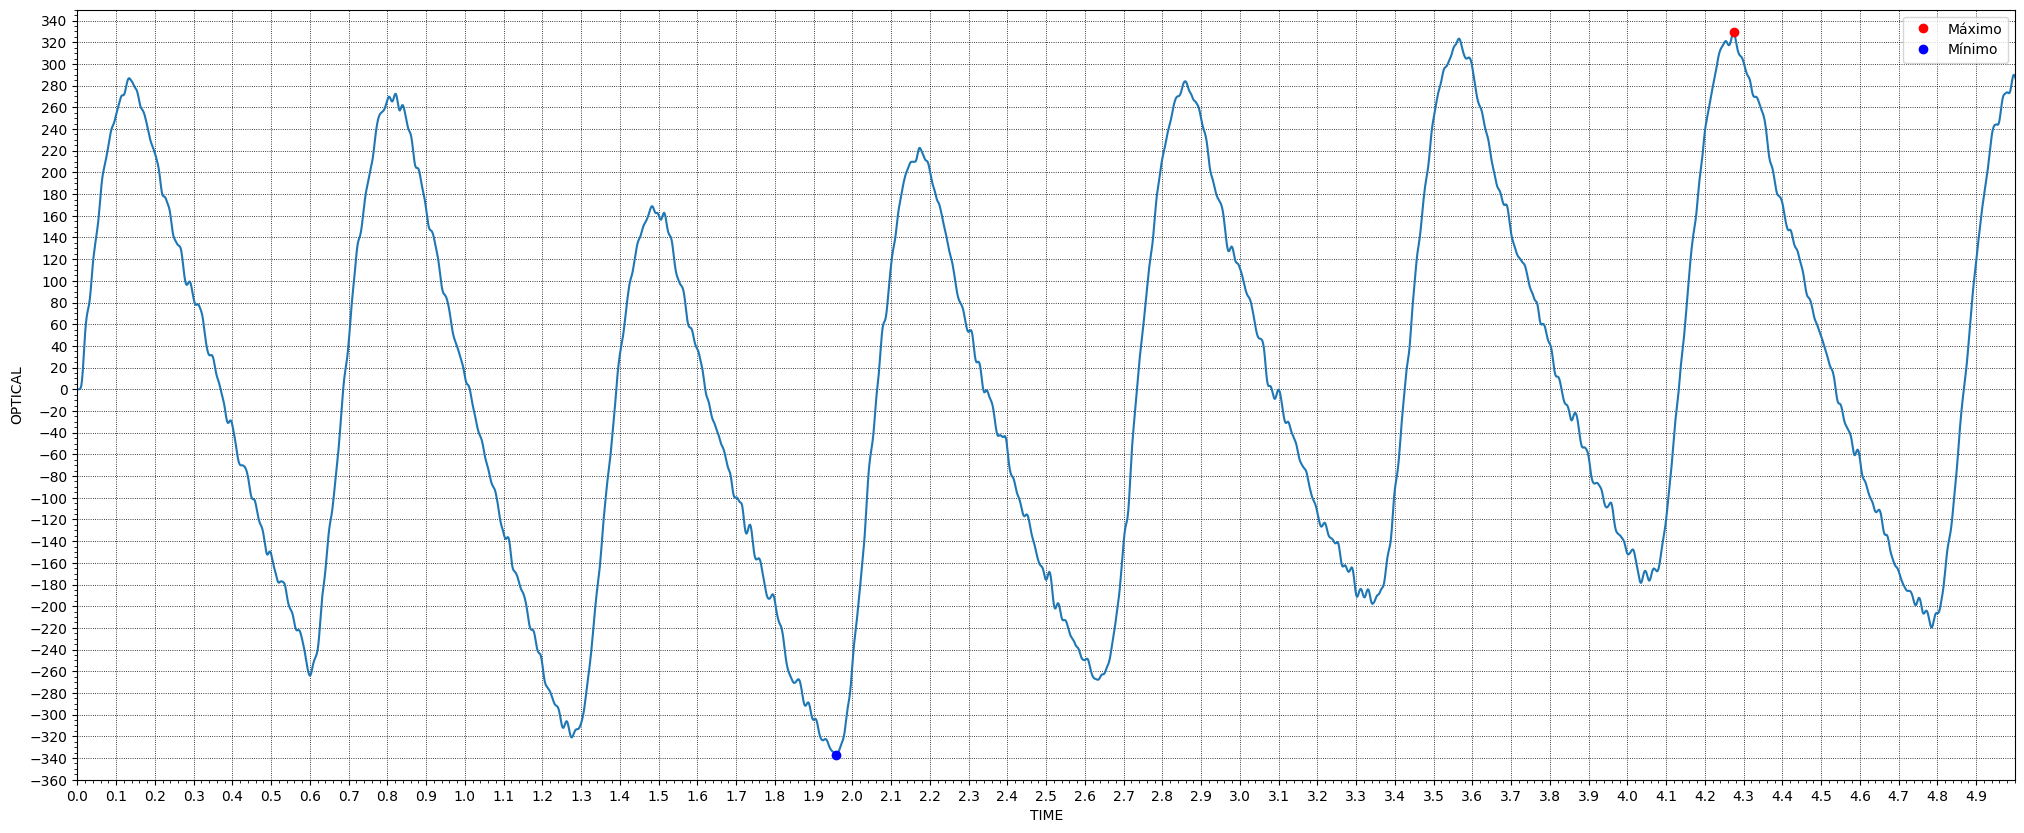

In [125]:

sinal_filtrado = _bandpass_filter(waveform_df.optical.to_numpy(), 0.25, 50)

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(t, sinal_filtrado)

axs.set_xlim(0, 5)
axs.set_ylim(-360, 350)
axs.set_yticks(np.arange(-360, 350, 20))
axs.set_xticks(np.arange(0.00, 5, 0.1))
axs.minorticks_on()
axs.grid(True, which='major', color='black', linestyle=':', linewidth=0.6, axis='both')
axs.set_xlabel("TIME")
axs.set_ylabel("OPTICAL")

# máximos e mínimos
localizar_extremos(t, sinal_filtrado, 0, 5, plotar=True, ax=axs);


#### ACELERAÇÃO DOS EIXOS NA TONOMETRIA

#####

Máximo: -0.7632 em t = 2.9540
Mínimo: -0.7827 em t = 2.8740


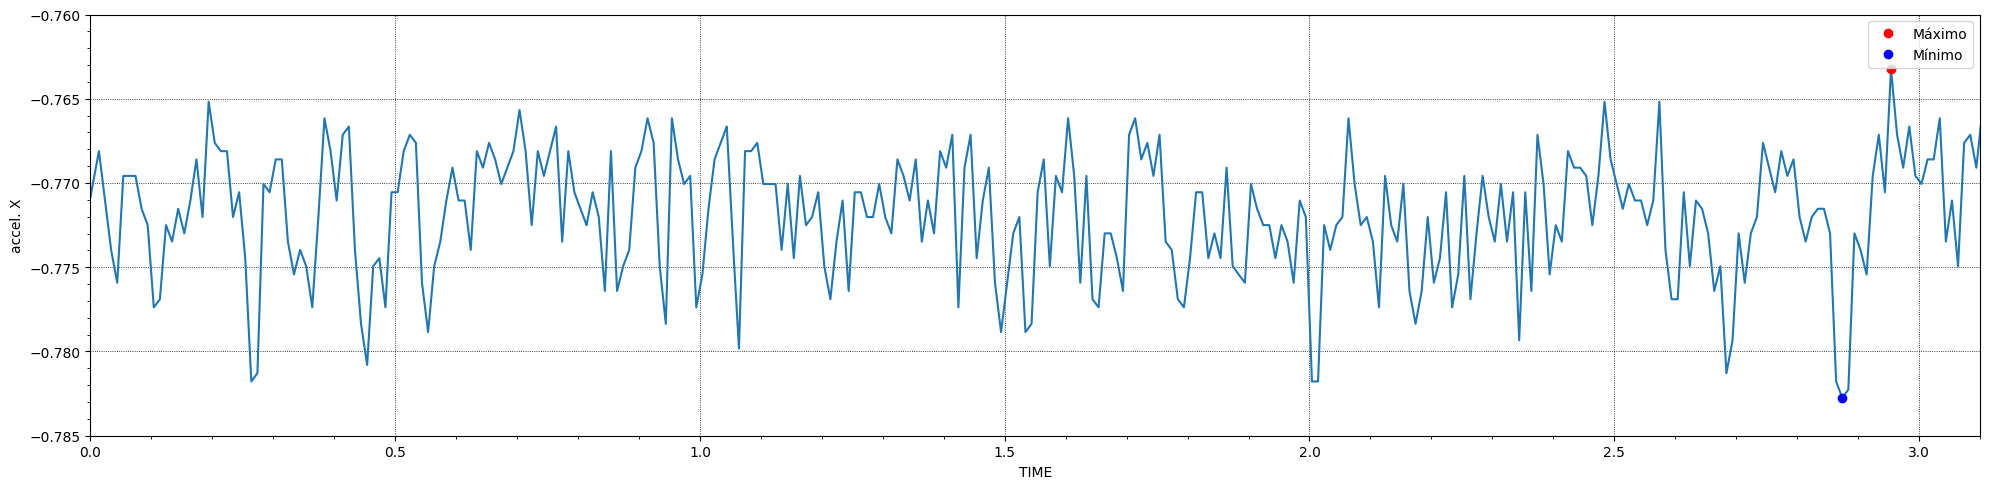

In [173]:
#-----------------------------------------EIXO X
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelX)
axs.set_xlim(0, 3.1)
axs.set_ylim(-0.785, -0.760)
# axs.set_xticks(np.arange(0, 3.1, 0.05));
# axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. X")

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)

localizar_extremos(t, accelX, 0, 3.1, plotar=True, ax=axs);

Máximo: -0.1527 em t = 0.6440
Mínimo: -0.1689 em t = 0.5640


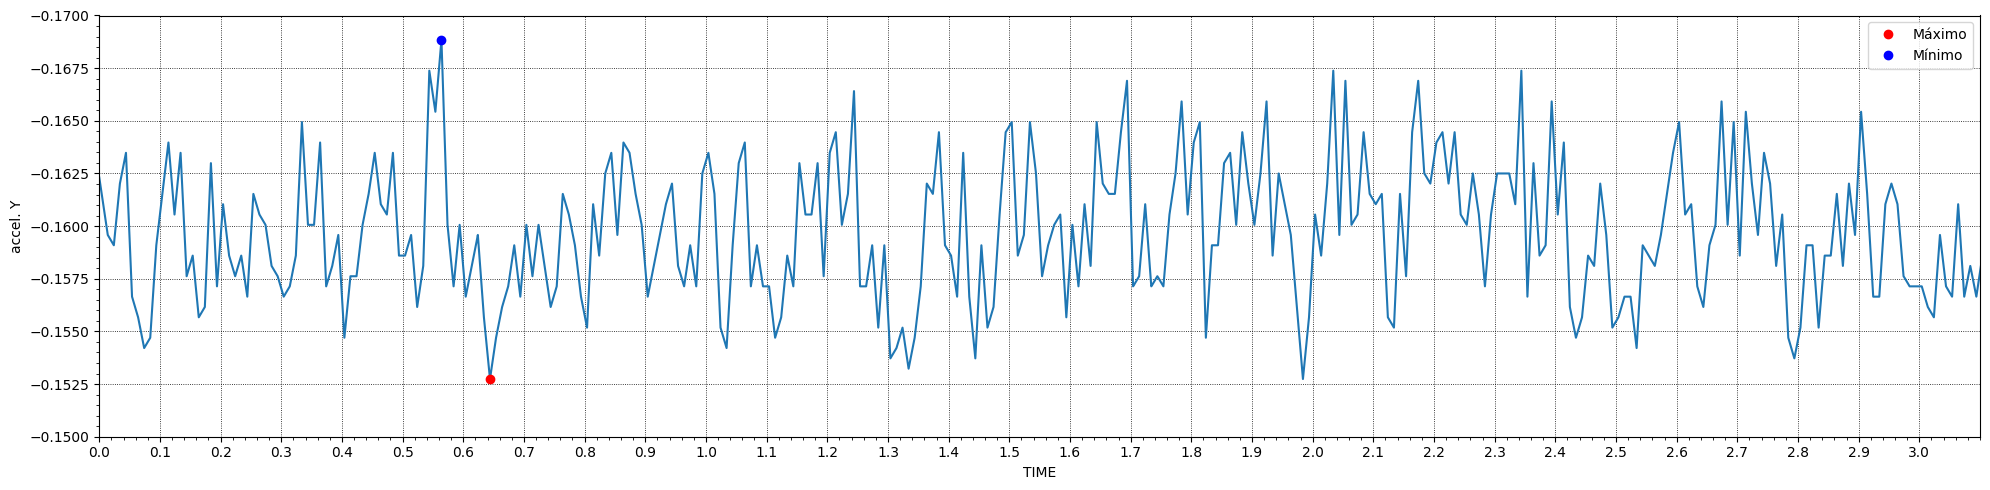

In [175]:
#-----------------------------------------EIXO Y
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelY)
axs.set_xlim(0, 3.1)
axs.set_ylim(-0.150, -0.170)
axs.set_xticks(np.arange(0, 3.1, 0.1));
# axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. Y")

localizar_extremos(t, accelY, 0, 3.1, plotar=True, ax=axs);

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)


Máximo: 0.6193 em t = 1.5940
Mínimo: 0.6046 em t = 2.0040


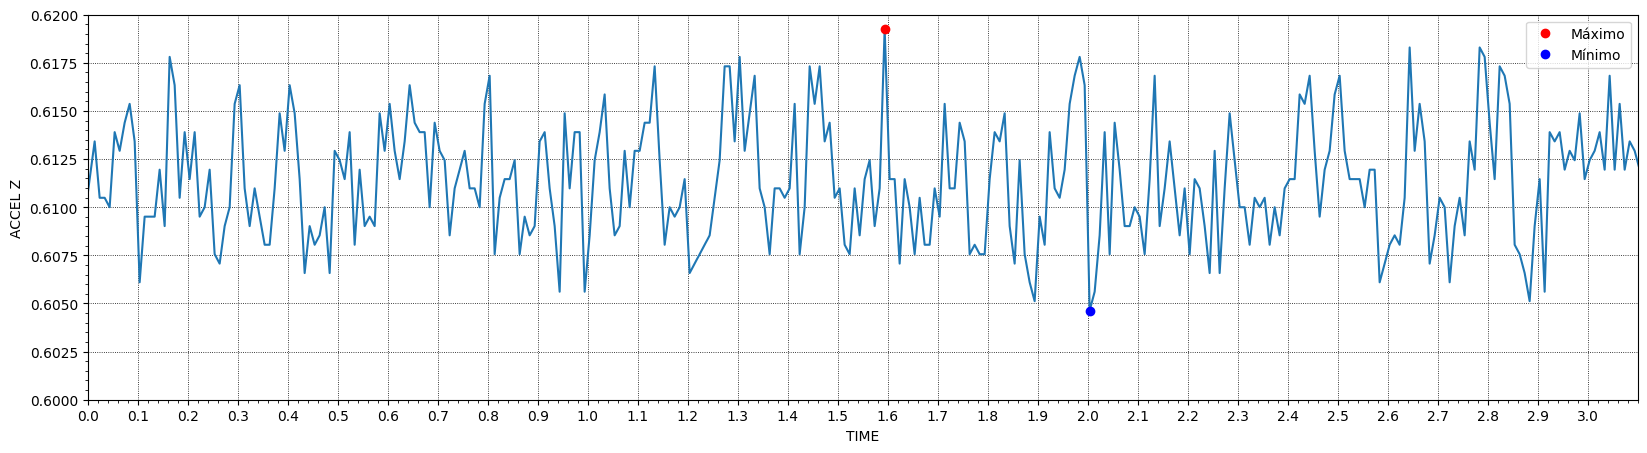

In [177]:
#-------------------------------------------------EIXO Z
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelZ)
axs.set_xlim(0, 3.1)
axs.set_ylim(0.600, 0.620)
axs.set_xticks(np.arange(0, 3.1, 0.1))
#axs.set_yticks(np.arange(0.605, 0.620, 0.05))
#axs.tick_params('x', labelrotation=45)
axs.minorticks_on()
axs.grid(True, which='major', axis='both', color ='black', linestyle=':', linewidth=0.6)

axs.set_xlabel("TIME")
axs.set_ylabel("ACCEL Z")

localizar_extremos(t, accelZ, 0, 3.1, plotar=True, ax=axs);
